In [36]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #binary ise Bernolli veya Gauss kullanılır
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob , Word
from nltk.stem.snowball import SnowballStemmer

from langdetect import detect
%matplotlib inline
import matplotlib.pyplot as plt


from nltk import word_tokenize

from wordcloud import WordCloud
from wordcloud import WordCloud , STOPWORDS


In [3]:
df = pd.read_csv("Game_of_Thrones_Script.csv")

In [4]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23911 non-null  object
 1   Season         23911 non-null  object
 2   Episode        23911 non-null  object
 3   Episode Title  23911 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23911 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
df = df[["Season","Sentence" , "Name"]]

In [8]:
df["Season"].value_counts()

Season 2    3914
Season 3    3573
Season 4    3446
Season 1    3179
Season 5    3035
Season 6    2856
Season 7    2442
Season 8    1466
Name: Season, dtype: int64

In [9]:
def clean_text(text):
    import re
    import string

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df["Sentence"] = df["Sentence"].apply(clean) 

In [10]:
import nltk 
from nltk import word_tokenize
nltk.download("punkt")

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
import nltk
from nltk.corpus import stopwords,words
nltk.download('stopwords')
stop_words = stopwords.words("english") 
stop_words = [word.replace("\'", "") for word in stop_words] # stop wordleri kaldırdım
df["Sentence"] = df["Sentence"].apply(lambda row: " ".join([token for token in row.split(" ") if token not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
from nltk.stem import WordNetLemmatizer

df["Sentence"]= df["Sentence"].apply(lambda x : WordNetLemmatizer().lemmatize(x))

In [14]:
df[["polarity" , "subjectivity"]] = df["Sentence"].apply(lambda x : pd.Series(TextBlob(x).sentiment))

In [15]:
df.loc[df["polarity"]>0.2 , "SentimentPolarity"] = "positive"
df.loc[df["polarity"]<-0.2 , "SentimentPolarity"] = "negative"
df["SentimentPolarity"].fillna("neutral" , inplace=True)


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SentimentPolarity', ylabel='count'>

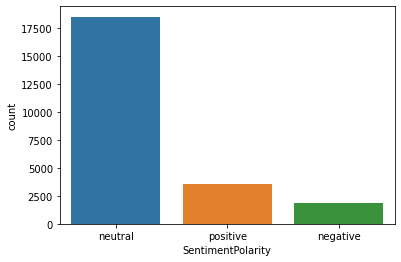

In [17]:
import seaborn as sns
sns.countplot(df["SentimentPolarity"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             23911 non-null  object 
 1   Sentence           23911 non-null  object 
 2   Name               23908 non-null  object 
 3   polarity           23911 non-null  float64
 4   subjectivity       23911 non-null  float64
 5   SentimentPolarity  23911 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [23]:
df_grouped = df.groupby("Name")["polarity"].mean().reset_index()

,Name,polarity
0,a voice,0.000000
1,addam marbrand,0.175000
2,aemon,0.000542
3,aeron,0.116835
4,aerson,0.100000
...,...,...
559,young hodor,0.000000
560,young lyanna,0.000000
561,young man,-0.095833
562,young ned,0.033333


In [25]:
df_grouped.loc[df_grouped["polarity"]>0.2 , "SentimentPolarity"] = "positive"
df_grouped.loc[df_grouped["polarity"]<-0.2 , "SentimentPolarity"] = "negative"
df_grouped["SentimentPolarity"].fillna("neutral" , inplace=True)


In [28]:
df_grouped.sort_values(by = "polarity" , ascending= False)

,Name,polarity,SentimentPolarity
490,tell me something,0.70,positive
174,innkeeper,0.70,positive
371,pyelle,0.65,positive
552,yarwyck,0.60,positive
279,manservant,0.60,positive
...,...,...,...
151,greizhen,-0.50,negative
74,client,-0.50,negative
91,deanerys targarian,-0.50,negative
423,roslin,-0.60,negative


En pozitif ve en negatif konuşan karakterleri görmüş olduk

Başrolümüz deanerys targeryan da en negatif konuşanlar arasında

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SentimentPolarity', ylabel='count'>

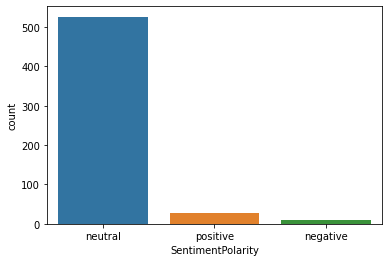

In [29]:
import seaborn as sns
sns.countplot(df_grouped["SentimentPolarity"])

Genel olarak karakterler nötr konuşmuş

## Sezonlara Göre Polarite

In [30]:
df_season = df.groupby("Season")["polarity"].mean().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

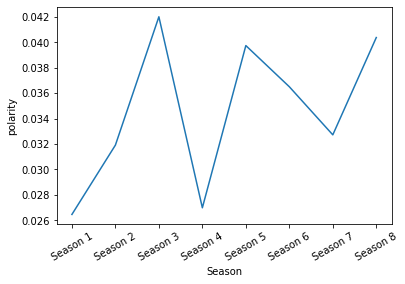

In [38]:
sns.lineplot(data = df_season , x="Season" , y = "polarity" ,sizes=(200, 15))
plt.xticks(rotation = 30)

In [39]:
from PIL import Image

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask =mask,
                   max_words=25000,
                   stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Succesfully")
    path = "wc.png"
    display(Image.open(path))

## En pozitif ve negaitf Polaritye göre WordCloud

In [42]:
df_season.sort_values(by ="polarity")

,Season,polarity
0,Season 1,0.026453
3,Season 4,0.026977
1,Season 2,0.031909
6,Season 7,0.032717
5,Season 6,0.036501
4,Season 5,0.039740
7,Season 8,0.040373
2,Season 3,0.042007


Word Cloud Saved Succesfully


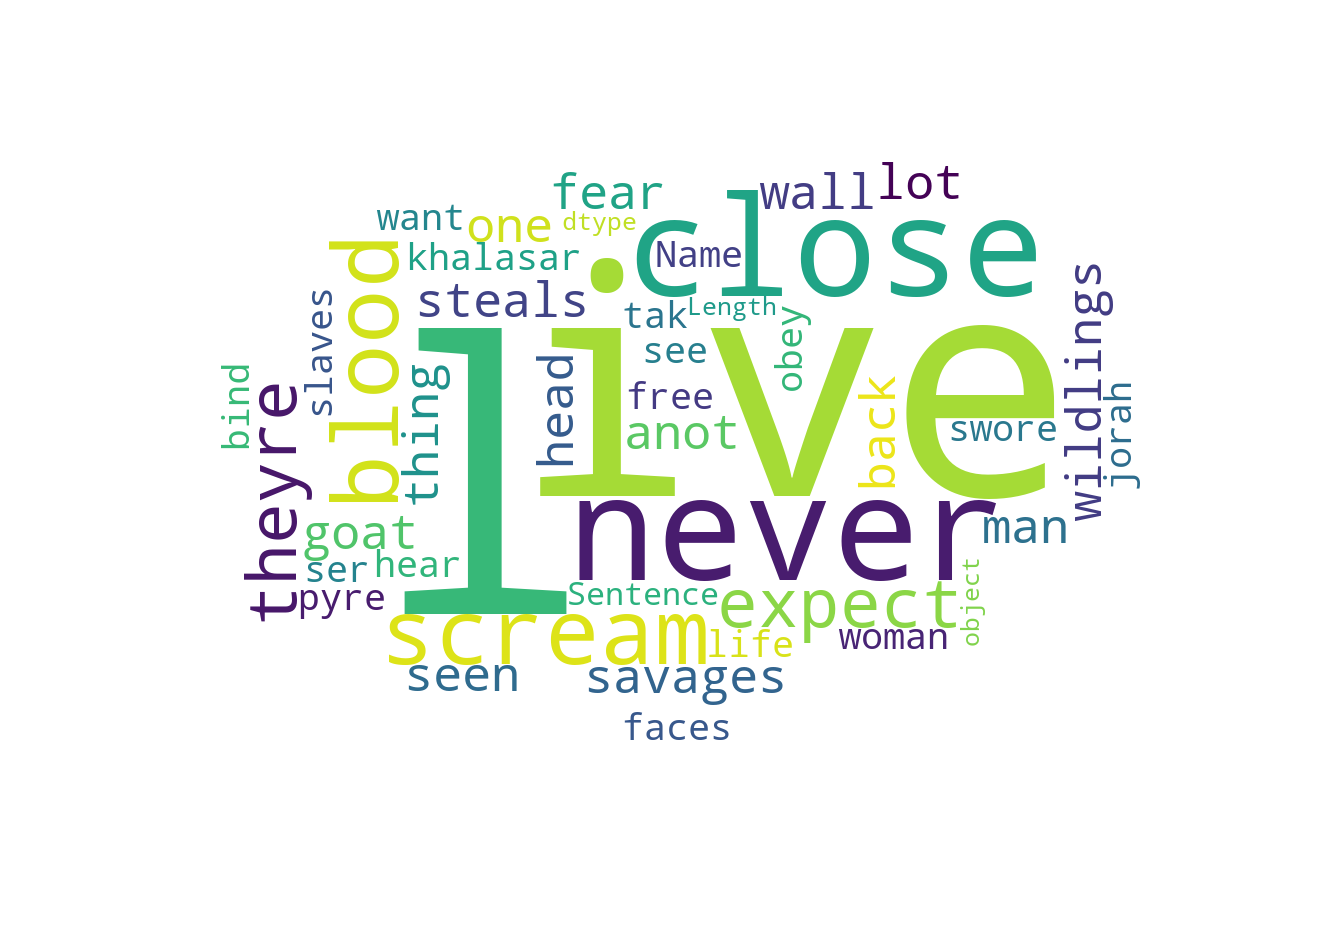

In [48]:
text1 = df[df["Season"]=="Season 1"]
create_wordcloud(text1.Sentence	)

Word Cloud Saved Succesfully


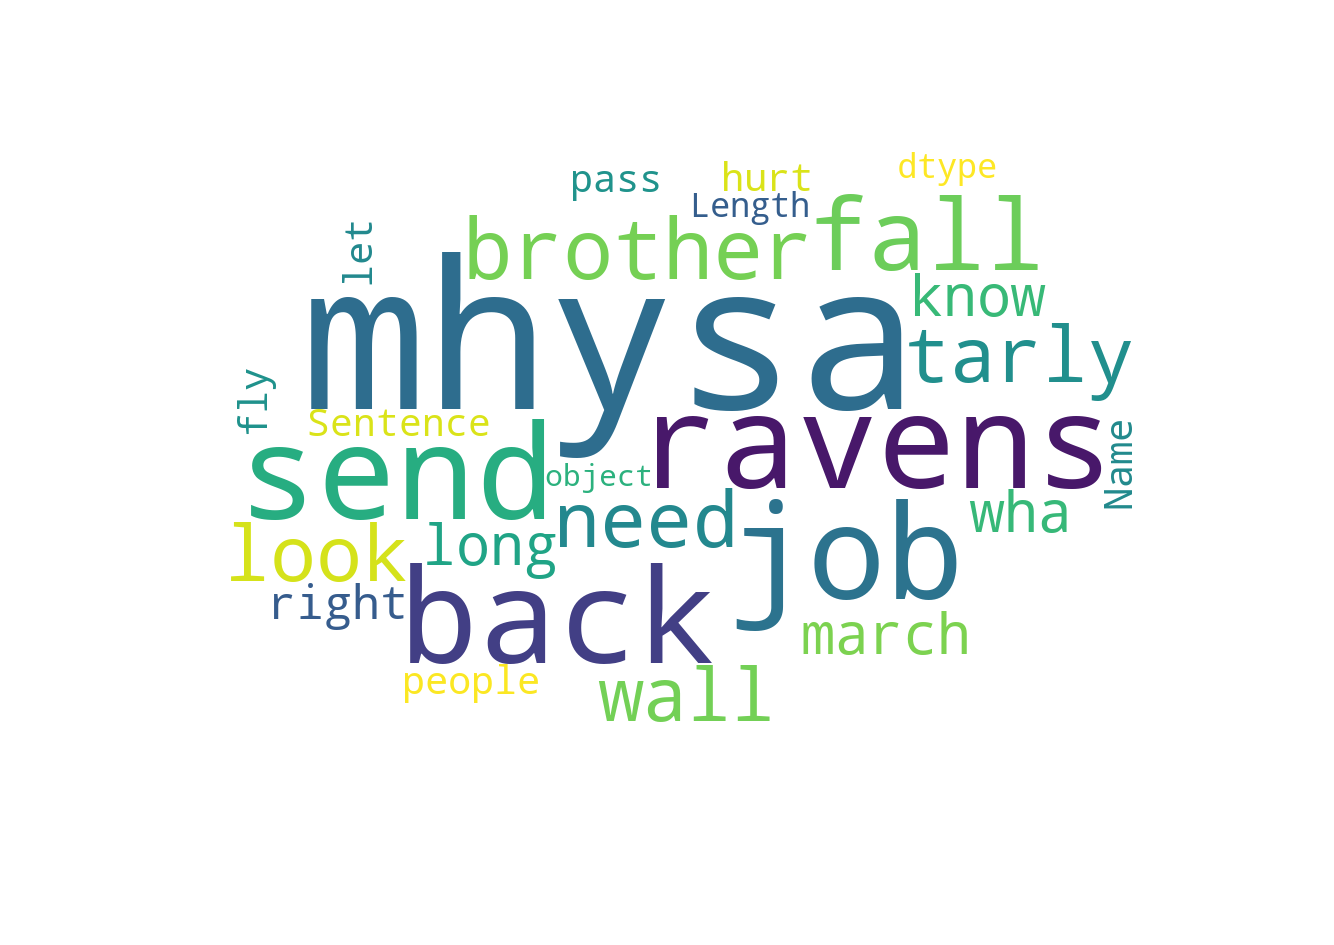

In [50]:
text1 = df[df["Season"]=="Season 3"]
create_wordcloud(text1.Sentence	)